In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/home/ajc348/rds/hpc-work/mopo')

In [3]:
import os

import numpy as np
import matplotlib.pyplot as plt

from dogo.plot_results import plot_dynamics_score_vs_agent_return

In [40]:
plt.rc('font', size=16)
cols = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [5]:
evaluation_datasets_lables = [
    ("D3RLPY-RT-0.1M-4-P0_10000", "D3RLPY: 0.1M"),
    ("D3RLPY-RT-0.2M-4-P0_10000", "D3RLPY: 0.2M"),
    ("D3RLPY-RT-0.5M-4-P0_10000", "D3RLPY: 0.5M"),
    ("D3RLPY-RT-1M-4-P0_10000", "D3RLPY: 1M"),
    ("D3RLPY-RT-2M-4-P0_10000", "D3RLPY: 2M"),
    ("D3RLPY-RT-0.1M-2-P0_10000", "D3RLPY 2 - 0.1M Steps"),
    ("D3RLPY-RT-0.2M-2-P0_10000", "D3RLPY 2 - 0.2M Steps"),
    ("D3RLPY-RT-0.5M-2-P0_10000", "D3RLPY 2 - 0.5M Steps"),
    ("D3RLPY-RT-1M-2-P0_10000", "D3RLPY 2 - 1M Steps"),
    ("D3RLPY-RT-2M-2-P0_10000", "D3RLPY 2 - 2M Steps"),
    ("D3RLPY-RT-0.1M-3-P0_10000", "D3RLPY 3 - 0.1M Steps"),
    ("D3RLPY-RT-0.2M-3-P0_10000", "D3RLPY 3 - 0.2M Steps"),
    ("D3RLPY-RT-0.5M-3-P0_10000", "D3RLPY 3 - 0.5M Steps"),
    ("D3RLPY-RT-1M-3-P0_10000", "D3RLPY 3 - 1M Steps"),
    ("D3RLPY-RT-2M-3-P0_10000", "D3RLPY 3 - 2M Steps"),
    ("SAC-RT-0.1M-4-P0_10000", "SL: 0.1M"),
    ("SAC-RT-0.25M-4-P0_10000", "SL: 0.25M"),
    ("SAC-RT-0.5M-4-P0_10000", "SL: 0.5M"),
    ("SAC-RT-1M-4-P0_10000", "SL: 1M"),
    ("SAC-RT-2M-4-P0_10000", "SL: 2M"),
    ("SAC-RT-3M-4-P0_10000", "SL: 3M"),
    ("SAC-RT-0.25M-2-P0_10000", "Softlearning 2 - 0.25M Steps"),
    ("SAC-RT-0.5M-2-P0_10000", "Softlearning 2 - 0.5M Steps"),
    ("SAC-RT-1M-2-P0_10000", "Softlearning 2 - 1M Steps"),
    ("SAC-RT-2M-2-P0_10000", "Softlearning 2 - 2M Steps"),
    ("SAC-RT-3M-2-P0_10000", "Softlearning 2 - 3M Steps"),
    ("SAC-RT-0.25M-3-P0_10000", "Softlearning 3 - 0.25M Steps"),
    ("SAC-RT-0.5M-3-P0_10000", "Softlearning 3 - 0.5M Steps"),
    ("SAC-RT-1M-3-P0_10000", "Softlearning 3 - 1M Steps"),
    ("SAC-RT-2M-3-P0_10000", "Softlearning 3 - 2M Steps"),
    ("SAC-RT-3M-3-P0_10000", "Softlearning 3 - 3M Steps"),
    ("D4RL-HC-M_10000", "D4RL: M"),
    ("D4RL-HC-ME_10000", "D4RL: ME"),
    ("D4RL-HC-MR_10000", "D4RL: MR"),
    ("D4RL-HC-R_10000", "D4RL: R"),
    ("RAND-1_10000", "Random 1"),
    ("RAND-2_10000", "Random 2"),
    ("RAND-3_10000", "Random 3"),
]
evaluation_datasets = [i[0] for i in evaluation_datasets_lables]
evaluation_labels = [i[1] for i in evaluation_datasets_lables]

rt_1_training_datasets_labels = [
    ("RAND-2_10000", "Random 2"),
    ("SAC-RT-0.25M-4-P0_10000", "SL: 0.25M"),
    ("SAC-RT-1M-4-P0_10000", "SL: 1M"),
    ("D3RLPY-RT-0.2M-4-P0_10000", "D3RLPY: 0.2M"),
    ("D3RLPY-RT-2M-4-P0_10000", "D3RLPY: 2M"),
]
rt_1_training_datasets = [i[0] for i in rt_1_training_datasets_labels]
rt_1_training_labels = [i[1] for i in rt_1_training_datasets_labels]

rt_3_training_datasets_labels = [
    ("RAND-2_10000", "Random 2"),
    ("RAND-3_10000", "Random 3"),
    ("SAC-RT-0.1M-4-P0_10000", "SL: 0.1M"),
    ("D3RLPY-RT-0.1M-4-P0_10000", "D3RLPY: 0.1M"),
    ("D3RLPY-RT-0.2M-4-P0_10000", "D3RLPY: 0.2M"),
]
rt_3_training_datasets = [i[0] for i in rt_3_training_datasets_labels]
rt_3_training_labels = [i[1] for i in rt_3_training_datasets_labels]

rt_4_training_datasets_labels = [
    ("SAC-RT-1M-4-P0_10000", "SL: 1M"),
    ("SAC-RT-2M-4-P0_10000", "SL: 2M"),
    ("SAC-RT-3M-4-P0_10000", "SL: 3M"),
    ("D3RLPY-RT-1M-4-P0_10000", "D3RLPY: 1M"),
    ("D3RLPY-RT-2M-4-P0_10000", "D3RLPY: 2M"),
]
rt_4_training_datasets = [i[0] for i in rt_4_training_datasets_labels]
rt_4_training_labels = [i[1] for i in rt_4_training_datasets_labels]

# All Datasets

## h=5

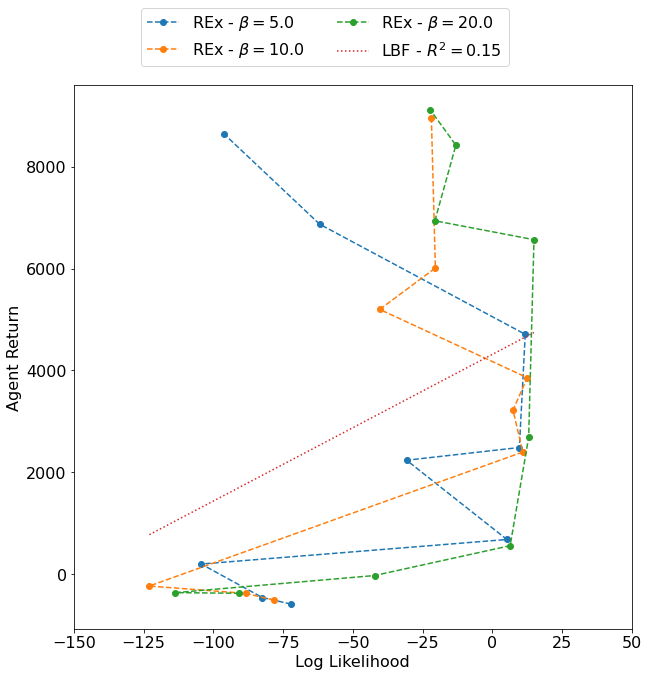

In [41]:
plot_dynamics_score_vs_agent_return([
    # (('HC049', 'HC050', 'HC051', 'HC097', 'HC098', 'HC099', 'HC151', 'HC152', 'HC153'), 'No REx'),
    (('HC052', 'HC053', 'HC054', 'HC100', 'HC101', 'HC102', 'HC154', 'HC155', 'HC156'), 'REx - $\\beta=5.0$'),
    (('HC055', 'HC056', 'HC057', 'HC103', 'HC104', 'HC105', 'HC157', 'HC158', 'HC159'), 'REx - $\\beta=10.0$'),
    (('HC058', 'HC059', 'HC060', 'HC106', 'HC107', 'HC108', 'HC160', 'HC161', 'HC162'), 'REx - $\\beta=20.0$'),
], eval_ds=evaluation_datasets, train_eval_ds=rt_1_training_datasets, show_secondary_metric=False, xmin=-150, xmax=50, agent_score_timesteps=500000)

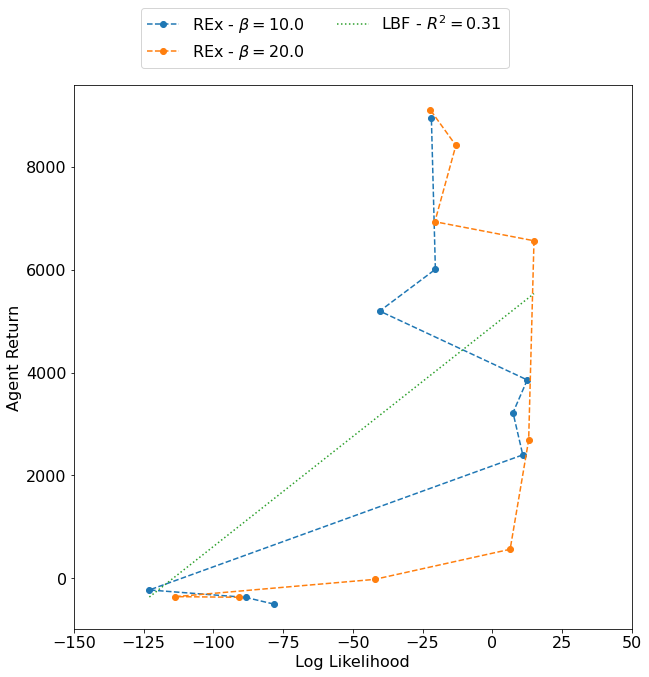

In [42]:
plot_dynamics_score_vs_agent_return([
    # (('HC049', 'HC050', 'HC051', 'HC097', 'HC098', 'HC099', 'HC151', 'HC152', 'HC153'), 'No REx'),
    # (('HC052', 'HC053', 'HC054', 'HC100', 'HC101', 'HC102', 'HC154', 'HC155', 'HC156'), 'REx - $\\beta=5.0$'),
    (('HC055', 'HC056', 'HC057', 'HC103', 'HC104', 'HC105', 'HC157', 'HC158', 'HC159'), 'REx - $\\beta=10.0$'),
    (('HC058', 'HC059', 'HC060', 'HC106', 'HC107', 'HC108', 'HC160', 'HC161', 'HC162'), 'REx - $\\beta=20.0$'),
], eval_ds=evaluation_datasets, train_eval_ds=rt_1_training_datasets, show_secondary_metric=False, xmin=-150, xmax=50, agent_score_timesteps=500000)

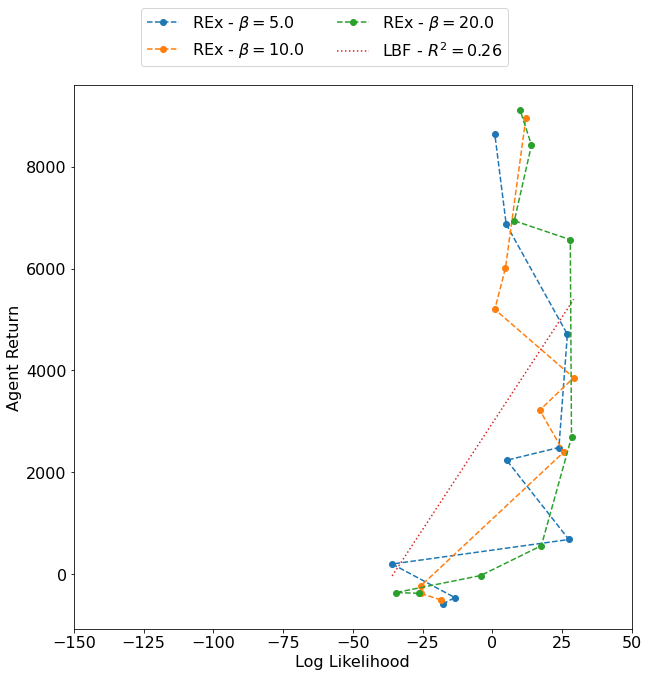

In [43]:
plot_dynamics_score_vs_agent_return([
    # (('HC049', 'HC050', 'HC051', 'HC097', 'HC098', 'HC099', 'HC151', 'HC152', 'HC153'), 'No REx'),
    (('HC052', 'HC053', 'HC054', 'HC100', 'HC101', 'HC102', 'HC154', 'HC155', 'HC156'), 'REx - $\\beta=5.0$'),
    (('HC055', 'HC056', 'HC057', 'HC103', 'HC104', 'HC105', 'HC157', 'HC158', 'HC159'), 'REx - $\\beta=10.0$'),
    (('HC058', 'HC059', 'HC060', 'HC106', 'HC107', 'HC108', 'HC160', 'HC161', 'HC162'), 'REx - $\\beta=20.0$'),
], eval_ds=evaluation_datasets, train_eval_ds=rt_1_training_datasets, show_secondary_metric=False, xmin=-150, xmax=50, agent_score_timesteps=500000, mode='id')

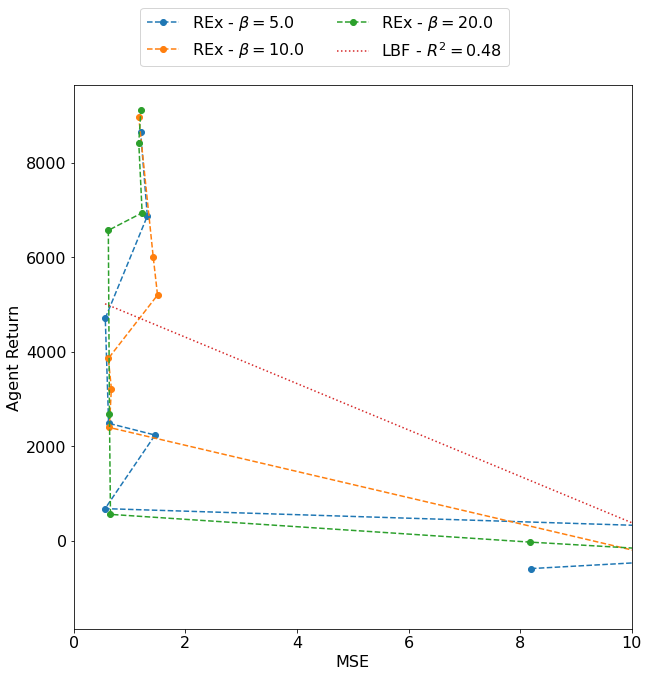

In [44]:
plot_dynamics_score_vs_agent_return([
    # (('HC049', 'HC050', 'HC051', 'HC097', 'HC098', 'HC099', 'HC151', 'HC152', 'HC153'), 'No REx'),
    (('HC052', 'HC053', 'HC054', 'HC100', 'HC101', 'HC102', 'HC154', 'HC155', 'HC156'), 'REx - $\\beta=5.0$'),
    (('HC055', 'HC056', 'HC057', 'HC103', 'HC104', 'HC105', 'HC157', 'HC158', 'HC159'), 'REx - $\\beta=10.0$'),
    (('HC058', 'HC059', 'HC060', 'HC106', 'HC107', 'HC108', 'HC160', 'HC161', 'HC162'), 'REx - $\\beta=20.0$'),
], eval_ds=evaluation_datasets, train_eval_ds=rt_1_training_datasets, primary_metric='overall_mse', xmin=0, xmax=10, show_secondary_metric=False, agent_score_timesteps=500000)

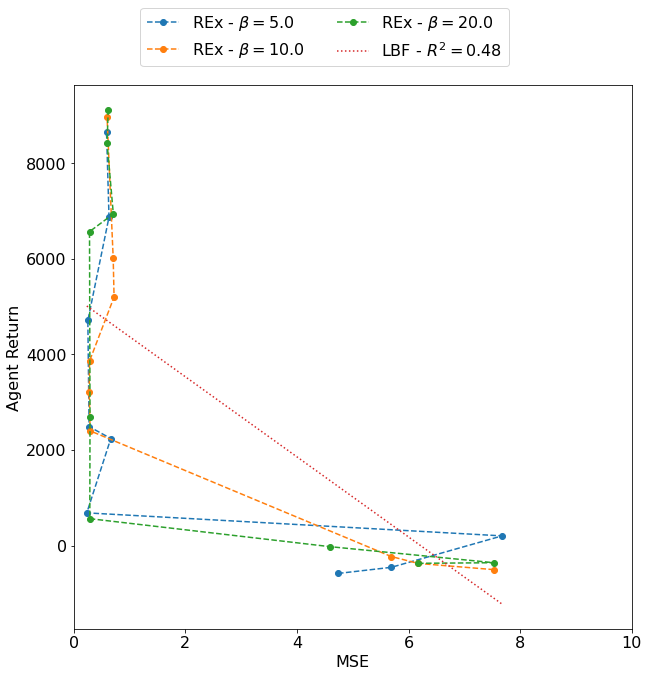

In [45]:
plot_dynamics_score_vs_agent_return([
    # (('HC049', 'HC050', 'HC051', 'HC097', 'HC098', 'HC099', 'HC151', 'HC152', 'HC153'), 'No REx'),
    (('HC052', 'HC053', 'HC054', 'HC100', 'HC101', 'HC102', 'HC154', 'HC155', 'HC156'), 'REx - $\\beta=5.0$'),
    (('HC055', 'HC056', 'HC057', 'HC103', 'HC104', 'HC105', 'HC157', 'HC158', 'HC159'), 'REx - $\\beta=10.0$'),
    (('HC058', 'HC059', 'HC060', 'HC106', 'HC107', 'HC108', 'HC160', 'HC161', 'HC162'), 'REx - $\\beta=20.0$'),
], eval_ds=evaluation_datasets, train_eval_ds=rt_1_training_datasets, primary_metric='overall_mse', xmin=0, xmax=10, show_secondary_metric=False, agent_score_timesteps=500000, mode='id')

## h=10

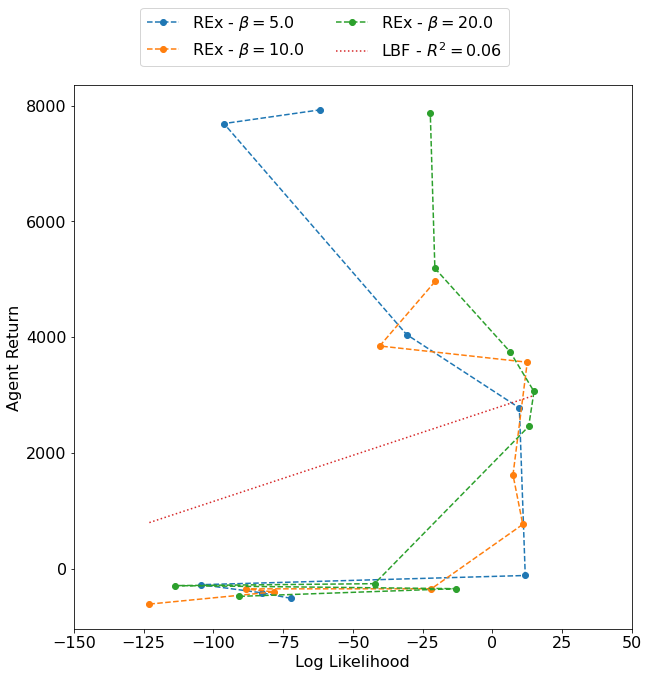

In [46]:
plot_dynamics_score_vs_agent_return([
    # (('HC061', 'HC062', 'HC063', 'HC109', 'HC110', 'HC111', 'HC163', 'HC164', 'HC165'), 'No REx'),
    (('HC064', 'HC065', 'HC066', 'HC112', 'HC113', 'HC114', 'HC166', 'HC167', 'HC168'), 'REx - $\\beta=5.0$'),
    (('HC067', 'HC068', 'HC069', 'HC115', 'HC116', 'HC117', 'HC169', 'HC170', 'HC171'), 'REx - $\\beta=10.0$'),
    (('HC070', 'HC071', 'HC072', 'HC118', 'HC119', 'HC120', 'HC172', 'HC173', 'HC174'), 'REx - $\\beta=20.0$'),
], eval_ds=evaluation_datasets, train_eval_ds=rt_1_training_datasets, show_secondary_metric=False, xmin=-150, xmax=50, agent_score_timesteps=500000)

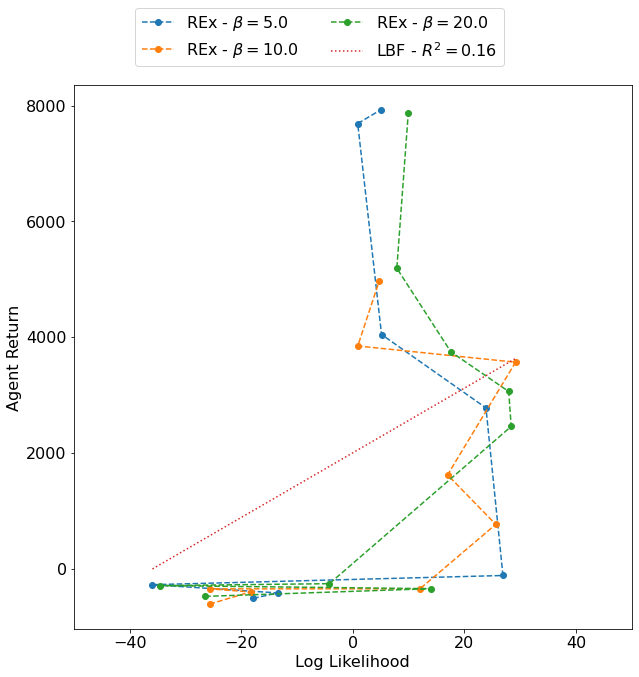

In [47]:
plot_dynamics_score_vs_agent_return([
    # (('HC061', 'HC062', 'HC063', 'HC109', 'HC110', 'HC111', 'HC163', 'HC164', 'HC165'), 'No REx'),
    (('HC064', 'HC065', 'HC066', 'HC112', 'HC113', 'HC114', 'HC166', 'HC167', 'HC168'), 'REx - $\\beta=5.0$'),
    (('HC067', 'HC068', 'HC069', 'HC115', 'HC116', 'HC117', 'HC169', 'HC170', 'HC171'), 'REx - $\\beta=10.0$'),
    (('HC070', 'HC071', 'HC072', 'HC118', 'HC119', 'HC120', 'HC172', 'HC173', 'HC174'), 'REx - $\\beta=20.0$'),
], eval_ds=evaluation_datasets, train_eval_ds=rt_1_training_datasets, show_secondary_metric=False, xmin=-50, xmax=50, agent_score_timesteps=500000, mode='id')

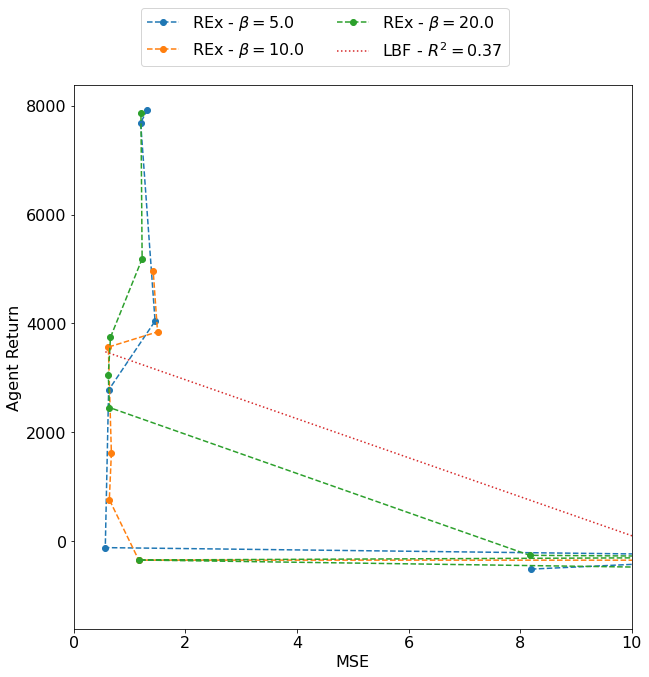

In [48]:
plot_dynamics_score_vs_agent_return([
    # (('HC061', 'HC062', 'HC063', 'HC109', 'HC110', 'HC111', 'HC163', 'HC164', 'HC165'), 'No REx'),
    (('HC064', 'HC065', 'HC066', 'HC112', 'HC113', 'HC114', 'HC166', 'HC167', 'HC168'), 'REx - $\\beta=5.0$'),
    (('HC067', 'HC068', 'HC069', 'HC115', 'HC116', 'HC117', 'HC169', 'HC170', 'HC171'), 'REx - $\\beta=10.0$'),
    (('HC070', 'HC071', 'HC072', 'HC118', 'HC119', 'HC120', 'HC172', 'HC173', 'HC174'), 'REx - $\\beta=20.0$'),
], eval_ds=evaluation_datasets, train_eval_ds=rt_1_training_datasets, primary_metric='overall_mse', xmin=0, xmax=10, show_secondary_metric=False, agent_score_timesteps=500000)

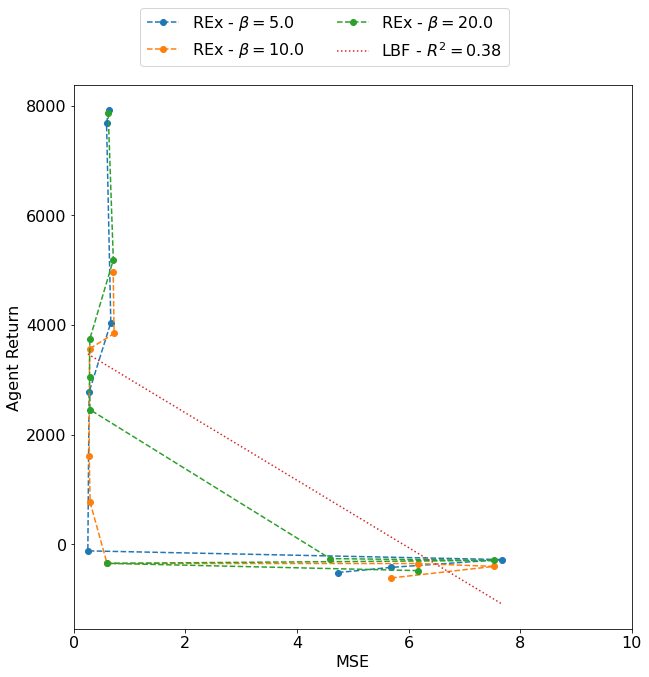

In [49]:
plot_dynamics_score_vs_agent_return([
    # (('HC061', 'HC062', 'HC063', 'HC109', 'HC110', 'HC111', 'HC163', 'HC164', 'HC165'), 'No REx'),
    (('HC064', 'HC065', 'HC066', 'HC112', 'HC113', 'HC114', 'HC166', 'HC167', 'HC168'), 'REx - $\\beta=5.0$'),
    (('HC067', 'HC068', 'HC069', 'HC115', 'HC116', 'HC117', 'HC169', 'HC170', 'HC171'), 'REx - $\\beta=10.0$'),
    (('HC070', 'HC071', 'HC072', 'HC118', 'HC119', 'HC120', 'HC172', 'HC173', 'HC174'), 'REx - $\\beta=20.0$'),
], eval_ds=evaluation_datasets, train_eval_ds=rt_1_training_datasets, primary_metric='overall_mse', xmin=0, xmax=10, show_secondary_metric=False, agent_score_timesteps=500000, mode='id')

# MIXED-RT-1

## h=5

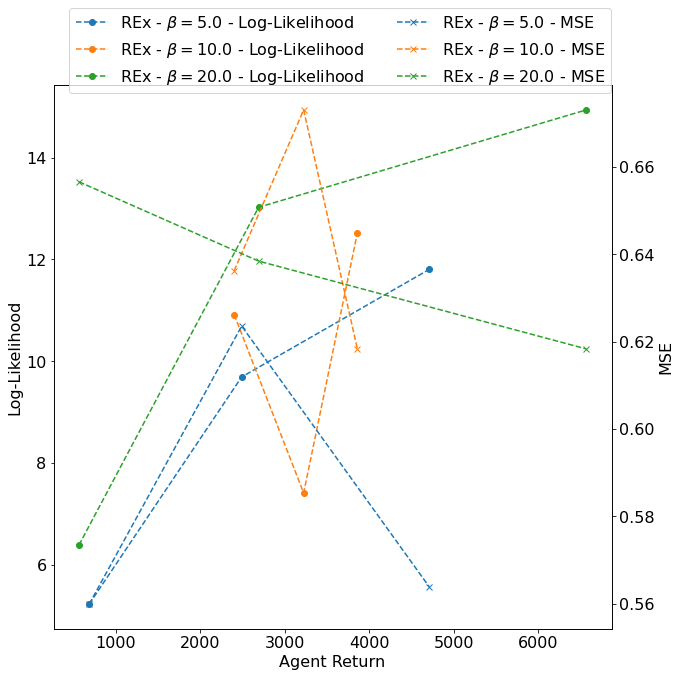

In [20]:
plot_dynamics_score_vs_agent_return([
    # (('HC049', 'HC050', 'HC051'), 'No REx'),
    (('HC052', 'HC053', 'HC054'), 'REx - $\\beta=5.0$'),
    (('HC055', 'HC056', 'HC057'), 'REx - $\\beta=10.0$'),
    (('HC058', 'HC059', 'HC060'), 'REx - $\\beta=20.0$'),
], eval_ds=evaluation_datasets, train_eval_ds=rt_1_training_datasets)

## h=10

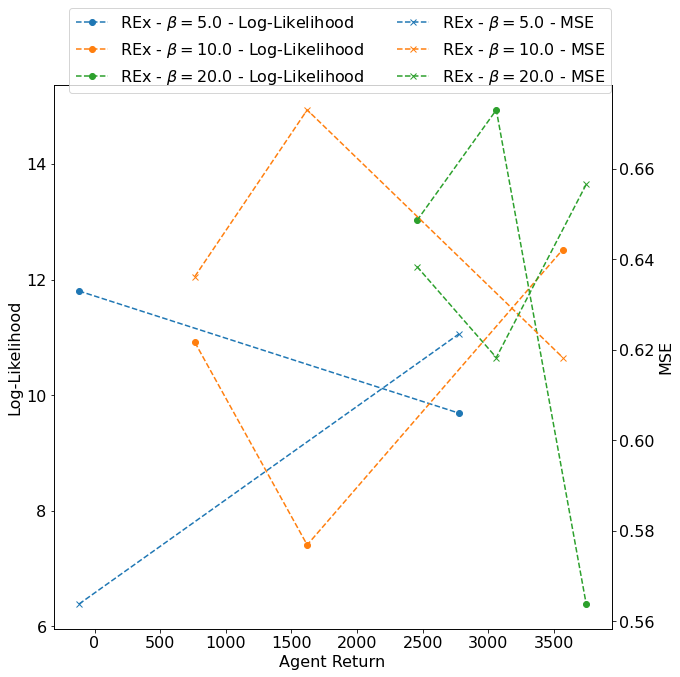

In [21]:
plot_dynamics_score_vs_agent_return([
    # (('HC061', 'HC062', 'HC063'), 'No REx'),
    (('HC064', 'HC065', 'HC066'), 'REx - $\\beta=5.0$'),
    (('HC067', 'HC068', 'HC069'), 'REx - $\\beta=10.0$'),
    (('HC070', 'HC071', 'HC072'), 'REx - $\\beta=20.0$'),
], eval_ds=evaluation_datasets, train_eval_ds=rt_1_training_datasets)

# MIXED-RT-3

## h=5

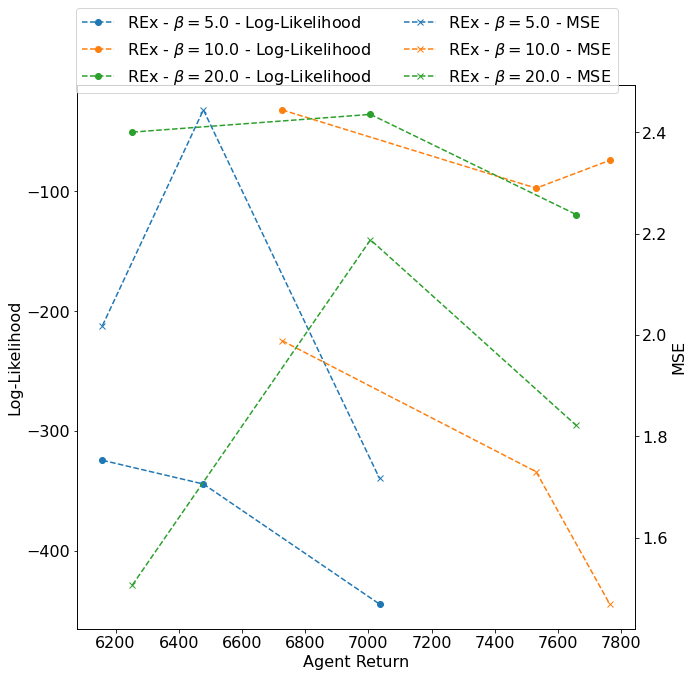

In [22]:
plot_dynamics_score_vs_agent_return([
    # (('HC073', 'HC074', 'HC075'), 'No REx'),
    (('HC076', 'HC077', 'HC078'), 'REx - $\\beta=5.0$'),
    (('HC079', 'HC080', 'HC081'), 'REx - $\\beta=10.0$'),
    (('HC082', 'HC083', 'HC084'), 'REx - $\\beta=20.0$'),
], eval_ds=evaluation_datasets, train_eval_ds=rt_1_training_datasets)

## h=10

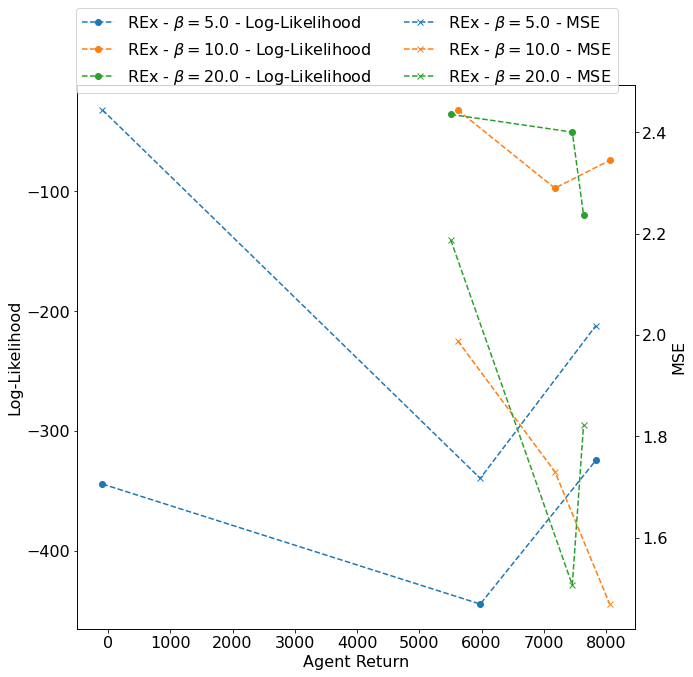

In [23]:
plot_dynamics_score_vs_agent_return([
    # (('HC085', 'HC086', 'HC087'), 'No REx'),
    (('HC088', 'HC089', 'HC090'), 'REx - $\\beta=5.0$'),
    (('HC091', 'HC092', 'HC093'), 'REx - $\\beta=10.0$'),
    (('HC094', 'HC095', 'HC096'), 'REx - $\\beta=20.0$'),
], eval_ds=evaluation_datasets, train_eval_ds=rt_1_training_datasets)

# MIXED-RT-4

## h=5

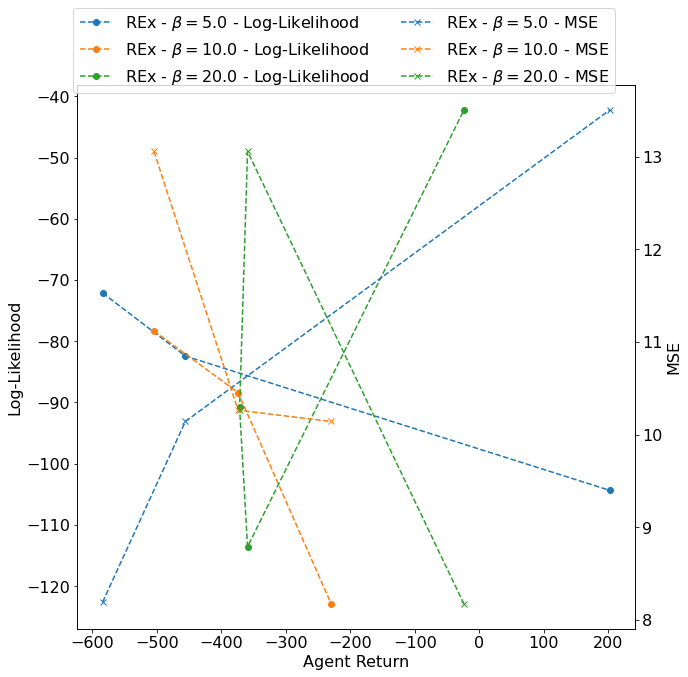

In [24]:
plot_dynamics_score_vs_agent_return([
    # (('HC097', 'HC098', 'HC099'), 'No REx'),
    (('HC100', 'HC101', 'HC102'), 'REx - $\\beta=5.0$'),
    (('HC103', 'HC104', 'HC105'), 'REx - $\\beta=10.0$'),
    (('HC106', 'HC107', 'HC108'), 'REx - $\\beta=20.0$'),
], eval_ds=evaluation_datasets, train_eval_ds=rt_1_training_datasets)

## h=10

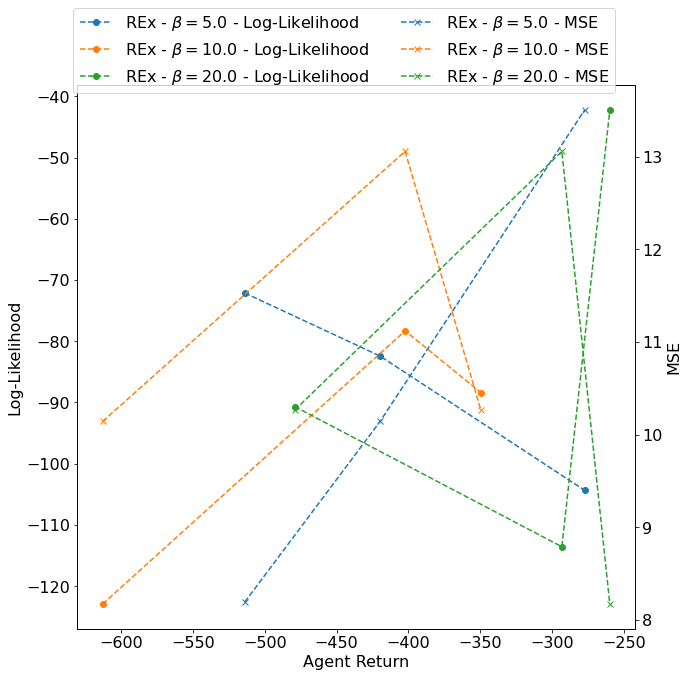

In [25]:
plot_dynamics_score_vs_agent_return([
    # (('HC109', 'HC110', 'HC111'), 'No REx'),
    (('HC112', 'HC113', 'HC114'), 'REx - $\\beta=5.0$'),
    (('HC115', 'HC116', 'HC117'), 'REx - $\\beta=10.0$'),
    (('HC118', 'HC119', 'HC120'), 'REx - $\\beta=20.0$'),
], eval_ds=evaluation_datasets, train_eval_ds=rt_1_training_datasets)